In [1]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%autoreload 2
import scienceplots

from PIL import Image
import matplotlib.pyplot as plt
from stardist import random_label_cmap
from skimage.measure import label
import numpy as np
cmap = random_label_cmap()

def create_size_mask(masks):
    size_masks = np.zeros_like(masks).astype(np.int64)
    for label in np.unique(masks)[1:]:
        bin_mask = (masks == label)
        mask_size = np.sum(bin_mask)
        size_masks += (bin_mask*mask_size)
    return size_masks


plt.style.use('nature')
import matplotlib
matplotlib.rcParams["xtick.minor.bottom"]=False
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=False
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = False
matplotlib.rcParams["ytick.minor.visible"] = False
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["ytick.labelsize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
plt.rcParams['figure.titlesize'] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True
matplotlib.rcParams["axes.titlesize"] = 6


Text(0.5, 1.0, 'Omni pretrained')

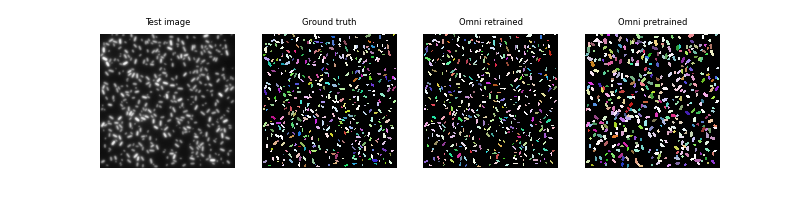

In [2]:
cells = np.array(Image.open("../../Omnipose_pretrained_vs_retrained/test_data/0004.png"))
masks_syntrained = np.array(Image.open("../../Omnipose_pretrained_vs_retrained/segmented_test_images/syntrained_4.png"))
masks_pretrained = np.array(Image.open("../../Omnipose_pretrained_vs_retrained/segmented_test_images/pretrained_4.png"))
GT = np.array(Image.open("../../Omnipose_pretrained_vs_retrained/test_data/0004_masks.png"))

fig, axs = plt.subplots(1, 4, figsize=(8,2))
for ax in axs:
    ax.set_axis_off()
axs[0].imshow(cells, cmap="Greys_r")
axs[1].imshow(GT, cmap=cmap, interpolation="none")
axs[2].imshow(masks_syntrained, cmap=cmap, interpolation="none")
axs[3].imshow(masks_pretrained, cmap=cmap, interpolation="none")

axs[0].set_title("Test image")
axs[1].set_title("Ground truth")
axs[2].set_title("Omni retrained")
axs[3].set_title("Omni pretrained")


Text(0.5, 1.0, 'Omni pretrained')

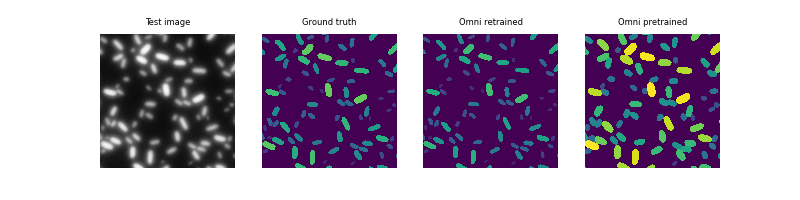

In [3]:
cells = np.array(Image.open("../../Omnipose_pretrained_vs_retrained/test_data/0004.png"))

fig, axs = plt.subplots(1, 4, figsize=(8,2))
for ax in axs:
    ax.set_axis_off()

GT_size = create_size_mask(GT)[300:-300,300:-300]
masks_syntrained_size = create_size_mask(masks_syntrained)[300:-300,300:-300]
masks_pretrained_size = create_size_mask(masks_pretrained)[300:-300,300:-300]

vmin = np.min(np.concatenate([GT_size, masks_syntrained_size, masks_pretrained_size]))
vmax = np.max(np.concatenate([GT_size, masks_syntrained_size, masks_pretrained_size]))

axs[0].imshow(cells[300:-300,300:-300], cmap="Greys_r")
axs[1].imshow(GT_size, vmin=vmin, vmax=vmax, interpolation="none")
axs[2].imshow(masks_syntrained_size, vmin=vmin, vmax=vmax, interpolation="none")
axs[3].imshow(masks_pretrained_size, vmin=vmin, vmax=vmax, interpolation="none")

axs[0].set_title("Test image")
axs[1].set_title("Ground truth")
axs[2].set_title("Omni retrained")
axs[3].set_title("Omni pretrained")


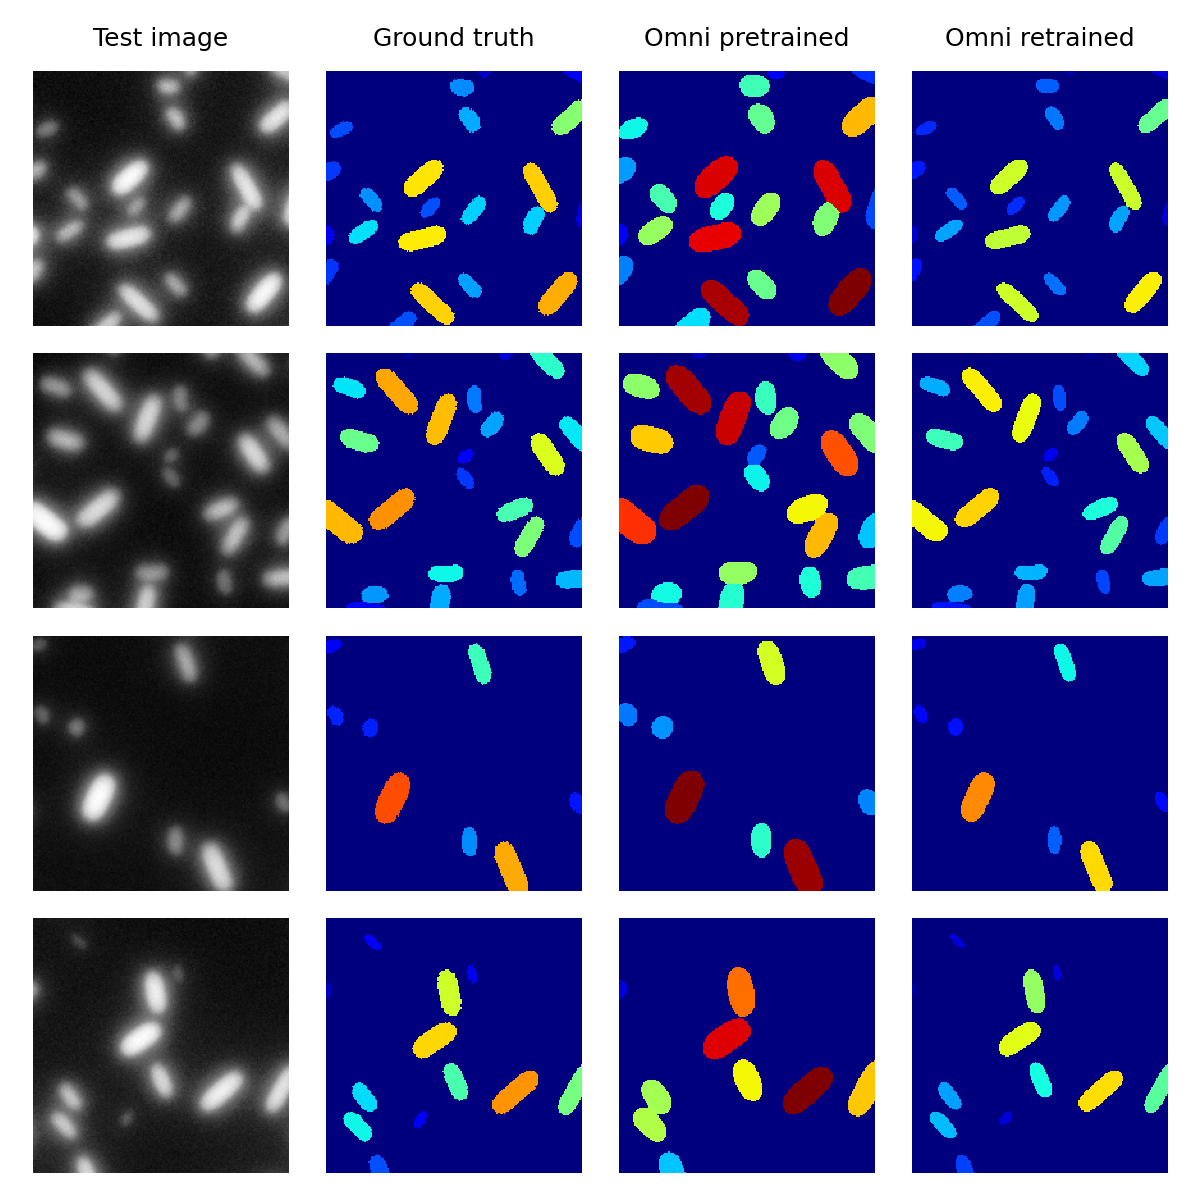

In [27]:
fig, axs = plt.subplots(4, 4, figsize=(4,4), dpi = 300)
for i in range(4):
    cells = np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/test_data/000{str(i*3)}.png"))[400:600,400:600]
    masks_syntrained = create_size_mask(np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/segmented_test_images/syntrained_{str(i*3)}.png"))[400:600,400:600])
    masks_pretrained = create_size_mask(np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/segmented_test_images/pretrained_{str(i*3)}.png"))[400:600,400:600])
    GT = create_size_mask(np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/test_data/000{str(i*3)}_masks.png"))[400:600,400:600])

    
    vmin = np.min(np.concatenate([GT, masks_syntrained, masks_pretrained]))
    vmax = np.max(np.concatenate([GT, masks_syntrained, masks_pretrained]))



    axs[i,0].imshow(cells, cmap="Greys_r")
    axs[i,1].imshow(GT, vmin=vmin, vmax=vmax, cmap="jet", interpolation="none")
    axs[i,3].imshow(masks_syntrained, vmin=vmin, vmax=vmax, cmap="jet",interpolation="none")
    axs[i,2].imshow(masks_pretrained, vmin=vmin, vmax=vmax, cmap="jet",interpolation="none")

axs[0,0].set_title("Test image")
axs[0,1].set_title("Ground truth")
axs[0,3].set_title("Omni retrained")
axs[0,2].set_title("Omni pretrained")
for ax in axs.flatten():
    ax.set_axis_off()
plt.tight_layout()
plt.savefig("size_compare.svg")

In [5]:
from matplotlib_scalebar.scalebar import ScaleBar

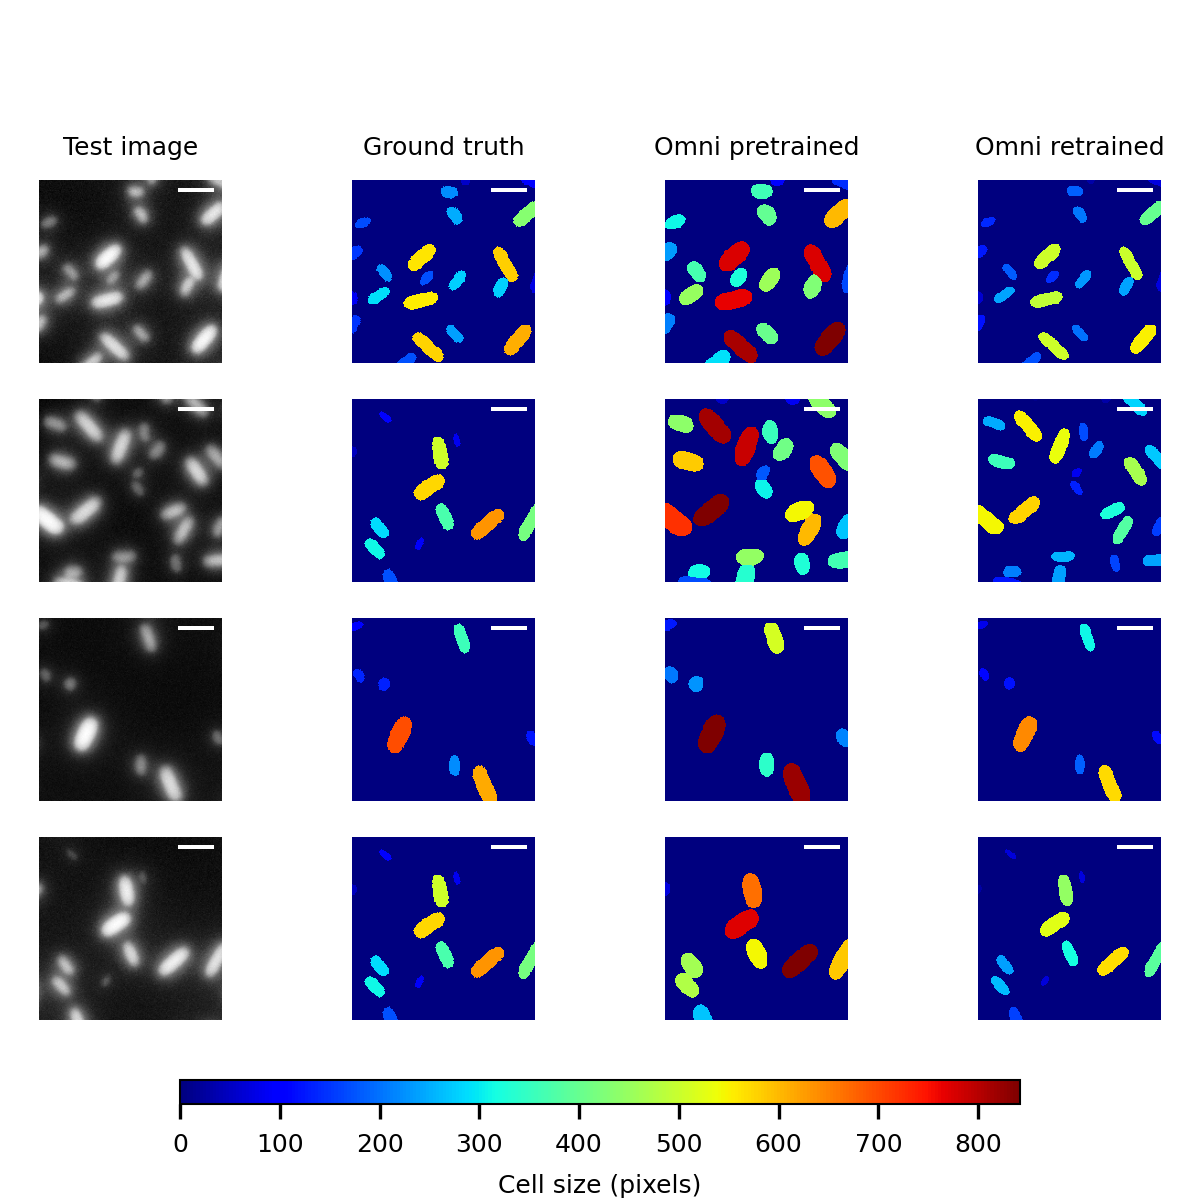

In [6]:
def create_size_mask(masks):
    size_masks = np.zeros_like(masks).astype(np.int64)
    for label in np.unique(masks)[1:]:
        bin_mask = (masks == label)
        mask_size = np.sum(bin_mask)
        size_masks += (bin_mask*mask_size)
    return size_masks

fig, axs = plt.subplots(4, 4, figsize=(4,4), dpi = 300)
for i in range(4):
    cells = np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/test_data/000{str(i*3)}.png"))[400:600,400:600]
    masks_syntrained = create_size_mask(np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/segmented_test_images/syntrained_{str(i*3)}.png"))[400:600,400:600])
    masks_pretrained = create_size_mask(np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/segmented_test_images/pretrained_{str(i*3)}.png"))[400:600,400:600])
    GT = create_size_mask(np.array(Image.open(f"../../Omnipose_pretrained_vs_retrained/test_data/000{str(i*3)}_masks.png"))[400:600,400:600])

    
    vmin = np.min(np.concatenate([GT, masks_syntrained, masks_pretrained]))
    vmax = np.max(np.concatenate([GT, masks_syntrained, masks_pretrained]))



    axs[i,0].imshow(cells, cmap="Greys_r")
    axs[i,1].imshow(GT, vmin=vmin, vmax=vmax, cmap="jet", interpolation="none")
    axs[i,3].imshow(masks_syntrained, vmin=vmin, vmax=vmax, cmap="jet",interpolation="none")
    axs[i,2].imshow(masks_pretrained, vmin=vmin, vmax=vmax, cmap="jet",interpolation="none")

    for _ in range(4):
        scalebar = ScaleBar(0.05, "um", length_fraction=0.5, width_fraction = 0.025, scale_loc="none", box_alpha=0, color="white", box_color="k") # 2 micon
        axs[i,_].add_artist(scalebar)
mappable = axs[1,1].imshow(GT, vmin=vmin, vmax=vmax, cmap="jet", interpolation="none")

axs[0,0].set_title("Test image", size = 6)
axs[0,1].set_title("Ground truth",size = 6)
axs[0,3].set_title("Omni retrained", size = 6)
axs[0,2].set_title("Omni pretrained", size = 6)


for ax in axs.flatten():
    ax.set_axis_off()

fig.subplots_adjust(bottom=0.2)

# Create the colorbar using the vmin and vmax
cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.02])
cb = plt.colorbar(mappable, cax=cbar_ax, orientation='horizontal', ticks=np.arange(vmin, vmax+1, 100))
cb.set_label('Cell size (pixels)')
fig.subplots_adjust(left=0.0, bottom=0.15, right=1, top=0.85)
plt.savefig("c.svg")
plt.show()




In [7]:
import pandas as pd
import seaborn as sns
from math import log10, floor

In [8]:
round_to_2 = lambda x: round(x, -int(floor(log10(x))) + (2 - 1))

In [9]:
IoU_data = pd.read_pickle("../../machine_learning_comparison/omnipose_IoU_data.pickle")
IoU_data["Area"] = IoU_data["Cell size (binned)"].astype(float).round(2)
IoU_data["Area"] = IoU_data["Area"].apply(round_to_2)
IoU_data['Model'] = IoU_data['Model'].replace('Syn-trained', 'Retrained')


Text(0.5, 0, 'Area ($\\mu m^2$)')

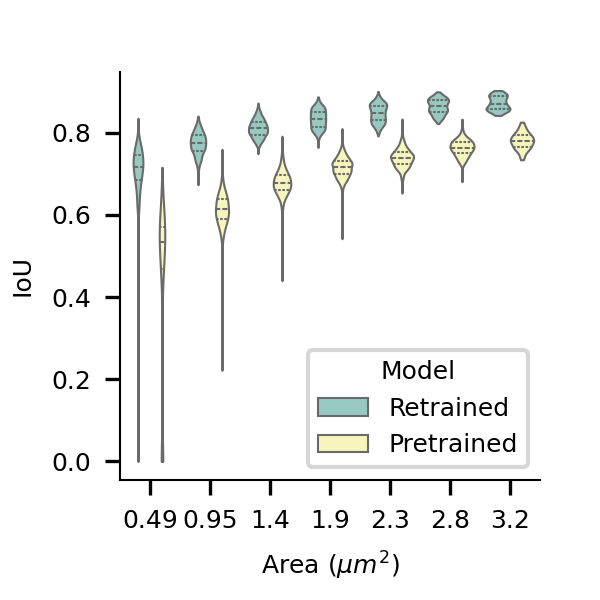

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(2,2), dpi = 300)
sns.violinplot(data = IoU_data, x = "Area", y = "IoU", hue="Model", split=False, palette="Set3", inner="quart", linewidth = 0.5, cut=0) # generalised IoU
plt.subplots_adjust(left = 0.2, bottom = 0.2)
plt.xlabel("Area ($\mu m^2$)")